# Bayesian Estimation of a Biased Coin

What are we up to?

## Preliminaries:  Tossing a Coin

Model of a coin toss.  Limitations.

Python setup.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heads = 0.73

In [3]:
samples = 100
tosses = np.random.uniform (0.0, 1.0, samples) < heads
print ('{0:d} tosses, {1:d} heads, {2:.1f}%'.format (
    samples,
    sum (tosses),
    100 * sum (tosses) / samples))

100 tosses, 76 heads, 76.0%


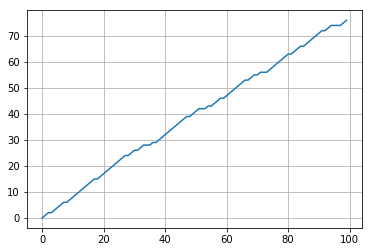

In [4]:
plt.plot (np.cumsum (tosses))
plt.grid ()
# plt.lines ((0, 0), (tosses, tosses))
plt.show ()

## Modeling Theta

The prior

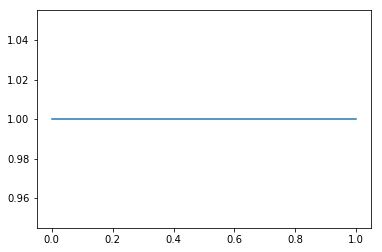

In [5]:
bins = 1000
theta = np.linspace (0, 1, bins)
prior = np.ones (bins)
plt.plot (theta, prior)
plt.show ()

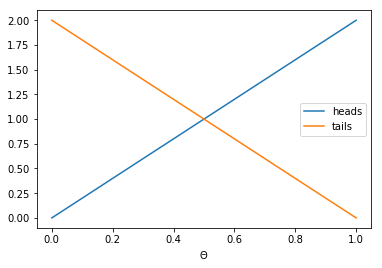

In [6]:
likelihood = np.linspace (0, 2, bins)
plt.plot (theta, likelihood, label='heads')
plt.plot (theta, 2 - likelihood, label='tails')
plt.xlabel ('$\Theta$')
plt.legend ()
plt.show ()

In [7]:
def posterior (prior, likelihood, range=1.0):
    """Compute a properly scaled posterior distribution."""
    post = prior * likelihood
    scale = sum (post) / len (post) / range
    return post / scale

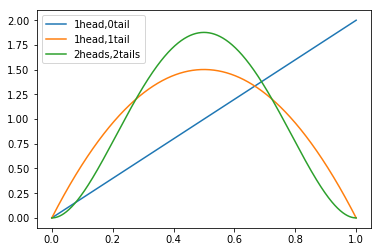

In [8]:
plt.plot (theta, posterior (prior, likelihood), label='1head,0tail')
plt.plot (theta, posterior (prior, likelihood * (2 - likelihood)), label='1head,1tail')
plt.plot (theta, posterior (prior, likelihood**2 * (2 - likelihood)**2), label='2heads,2tails')
plt.legend ()
plt.show ()

## Convergence Heat Map

Visualization infrastructure

In [18]:
def heatmapper (estimates, heads):
    plt.pcolormesh (estimates)
    plt.plot (np.argmax (estimates, 0))
    plt.hlines (heads * samples, 0, samples+1, linestyles='--')
    plt.set_cmap ('PuRd_r')
    plt.colorbar ()

## The Model in Action

First cut:  by hand.

In [19]:
prior = np.ones (bins)
estimates = np.empty (shape=(bins, samples+1), dtype=np.float64)
estimates[:,0] = prior
for i, toss in enumerate (tosses):
    if toss:
        prior = posterior (prior, likelihood)
    else:
        prior = posterior (prior, 2 - likelihood)
    estimates[:,i+1] = prior

Show the result:  how is the convergence?

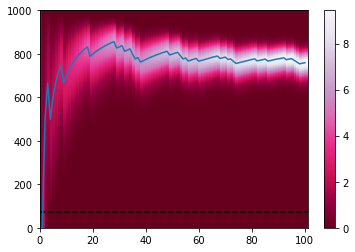

In [21]:
heatmapper (estimates, heads)
plt.show ()

## Is the Coin Fair?

## Appendix

A different approach to the computation:  vectorized, rather than explicitly looped.

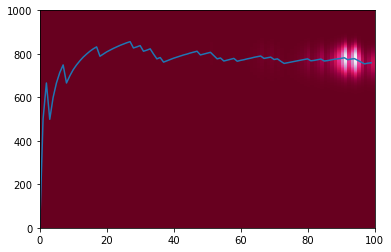

In [17]:
estimates = np.matmul (likelihood.reshape ((-1, 1)), tosses.reshape ((1, -1)))
estimates += np.matmul (2 - likelihood.reshape ((-1, 1)), ~tosses.reshape ((1, -1)))
estimates = np.cumprod (estimates, 1)
plt.pcolormesh (estimates)
plt.plot (np.argmax (estimates, 0))
plt.show ()